In [ ]:
# 1. Decision Tree
# 2-1) scikit-learn 내장 데이터 셋 불러오기
from sklearn.datasets import load_iris
import pandas as pd

# 데이터셋 로드하기
iris = load_iris()

In [7]:
# 2-2) 직접 데이터셋 생성
# 데이터 정의
data = pd.DataFrame({"no_insects": [True, True, True, False, True, True, True, True, True, False],
                     "no_wilting": [True, True, True, True, True, True, False, True, True, True],
                     "no_diseases": [True, True, False, True, True, True, False, False, True, True],
                     "tree_health": ["Good", "Good", "Poor", "Good", "Good", "Good", "Poor", "Poor", "Good", "Poor"]},
                    columns=["no_insects", "no_wilting", "no_diseases", "tree_health"]
                    )


In [10]:
# 2-3) csv 파일 불러오기
# df = pd.read_csv('/...csv')

In [13]:
# 3) pandas 데이터프레임 구성
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"]=iris.target
df

"""
Iris data의 target
0 : setosa
1 : versicolor
2 : virginica
"""

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
# 4) train/test 분리
# train과 test set으로 나누기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,test_size=0.2, stratify=iris.target )

# train과 test data의 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# training에 80%, test에 20%로 할당된 것을 확인

"""
Train_test_split의 파라미터 설명

input data: iris.data
output data: iris.target

Test_size = 0.2
: train test 비율을 8:2로 설정

Stratify = iris.targe
: stratify값을 target으로 지정해주면,
각 클래스를 같은 비율로 train과 test에 할당
(한쪽에 치우치지 않도록)
"""

(120, 4) (30, 4) (120,) (30,)


In [15]:
# 5) 모델 생성 및 학습
from sklearn.tree import DecisionTreeClassifier

# 모델 생성
dt = DecisionTreeClassifier()

# 학습
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
# 6) Evaluation
from sklearn.metrics import accuracy_score

# training dataset으로 예측
pred_train = dt.predict(X_train)

# test dataset 으로 예측
pred_test = dt.predict(X_test)

# 정확도 계산
acc_train = accuracy_score(pred_train, y_train)
acc_test = accuracy_score(pred_test, y_test)

print(f"훈련데이터셋 정확도: {acc_train}, 테스트 데이터셋 정확도: {acc_test}")

훈련데이터셋 정확도: 1.0, 테스트 데이터셋 정확도: 0.9666666666666667


In [17]:
# 7) Overfitting을 방지하는 파라미터를 이용해 모델 재학습
from sklearn.tree import DecisionTreeClassifier

# 모델 생성
dt = DecisionTreeClassifier(max_depth=3, min_samples_split=4)

# 학습
dt.fit(X_train, y_train)

"""
Decision Tree Classifier의 파라미터
Max_depth: 트리의 최대 깊이
Min_sample_split: 노드를 분할하기 위한 최소 샘플 데이터 수

ex) min_samples_split을 4로 설정하였을 때,
노드의 샘플 수가 3이면 분할하지 않는다.
"""

DecisionTreeClassifier(max_depth=3, min_samples_split=4)

In [18]:
# 8) Evaluation
from sklearn.metrics import accuracy_score

# training dataset으로 예측
pred_train = dt.predict(X_train)

# test dataset으로 예측
pred_test = dt.predict(X_test)

# 정확도 계산
acc_train = accuracy_score(pred_train, y_train)
acc_test = accuracy_score(pred_test, y_test)

print(f"훈련데이터셋 정확도:{acc_train}, 테스트 데이터셋 정확도:{acc_test}")

훈련데이터셋 정확도:0.975, 테스트 데이터셋 정확도:0.9666666666666667


[Text(0.375, 0.875, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = 0'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = 0'),
 Text(0.5, 0.625, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = 1'),
 Text(0.25, 0.375, 'petal length (cm) <= 5.35\ngini = 0.169\nsamples = 43\nvalue = [0, 39, 4]\nclass = 1'),
 Text(0.125, 0.125, 'gini = 0.093\nsamples = 41\nvalue = [0, 39, 2]\nclass = 1'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = 2'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]\nclass = 2'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = 2'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]\nclass = 2')]

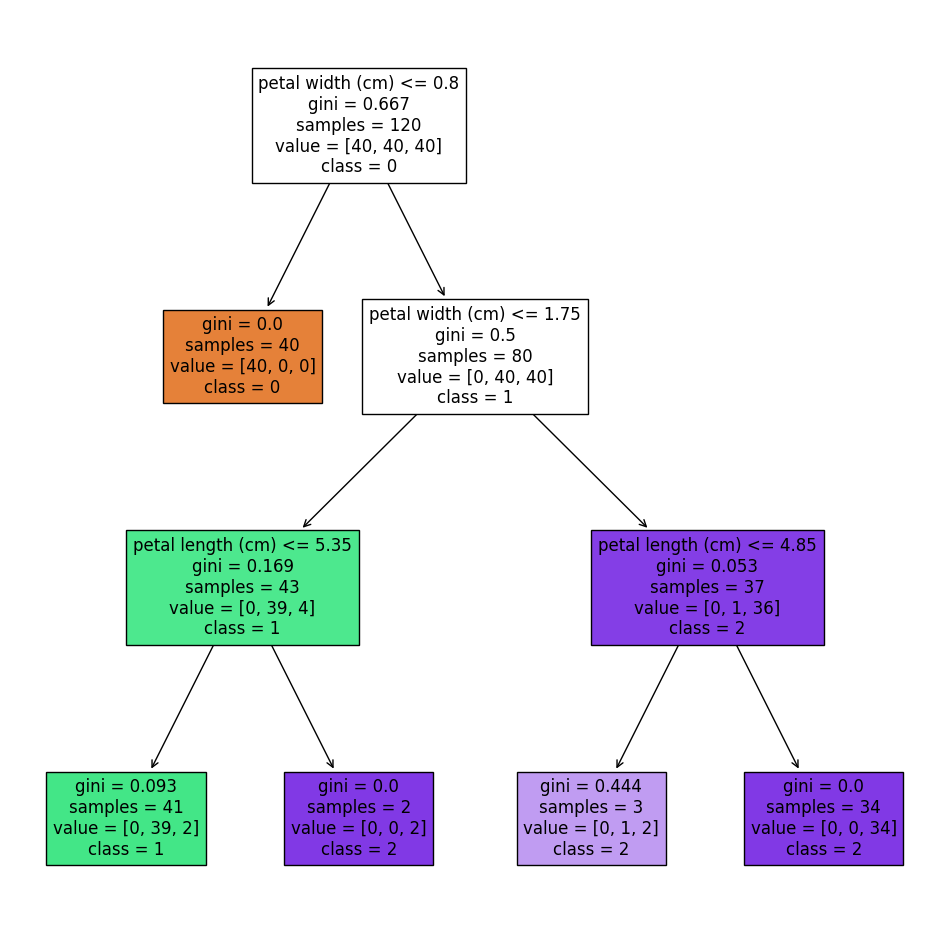

In [21]:
# 9) 시각화
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plot_tree(dt, feature_names=iris.feature_names, class_names=["0", "1", "2"], filled=True)

In [23]:
# 2. Random Forest
# 1) 모델 생성/학습/예측

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 모델 생성
rfc = RandomForestClassifier()

# 모델 training
rfc.fit(X_train, y_train)

# 모델 예측
pred = rfc.predict(X_test)

# 모델 accuracy 계산
acc = accuracy_score(pred, y_test)

# print하기
print("random forest accuracy: {:.4f}".format(acc))

random forest accuracy: 0.9667


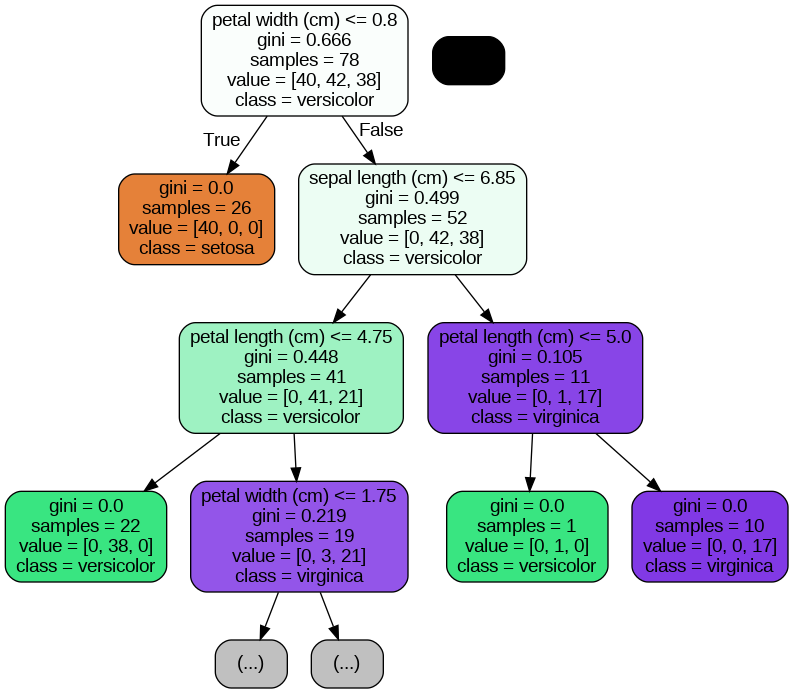

In [27]:
# 2) Random Forest 시각화
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

# Random Forest 모델에서 3번째 결정 트리를 선택
estimator = rfc.estimators_[2]

export_graphviz(estimator, out_file='tree.dot',
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded = True, # 박스의 모양을 둥글게
                )

# .dot 파일을 이미지로 변환
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# 이미지를 표시
Image(graph.create_png())